In [5]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [7]:
#Upload the data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]

df = pd.read_csv(url, header=None, names=column_names)

# Show first 10 data
df.head(10)

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   
5      1    14.20        1.76  2.45               15.2        112   
6      1    14.39        1.87  2.45               14.6         96   
7      1    14.06        2.15  2.61               17.6        121   
8      1    14.83        1.64  2.17               14.0         97   
9      1    13.86        1.35  2.27               16.0         98   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39                  0.34             1.97   
6           2.50        2.52                  0.30             1.98   
7           2.60        2.51                  0.31             1.25   
8           2.80        2.98                  0.29             1.98   
9           2.98        3.15                  0.22             1.85   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735  
5             6.75  1.05                          2.85     1450  
6             5.25  1.02                          3.58     1290  
7             5.05  1.06                          3.58     1295  
8             5.20  1.08                          2.85     1045  
9             7.22  1.01                          3.55     1045

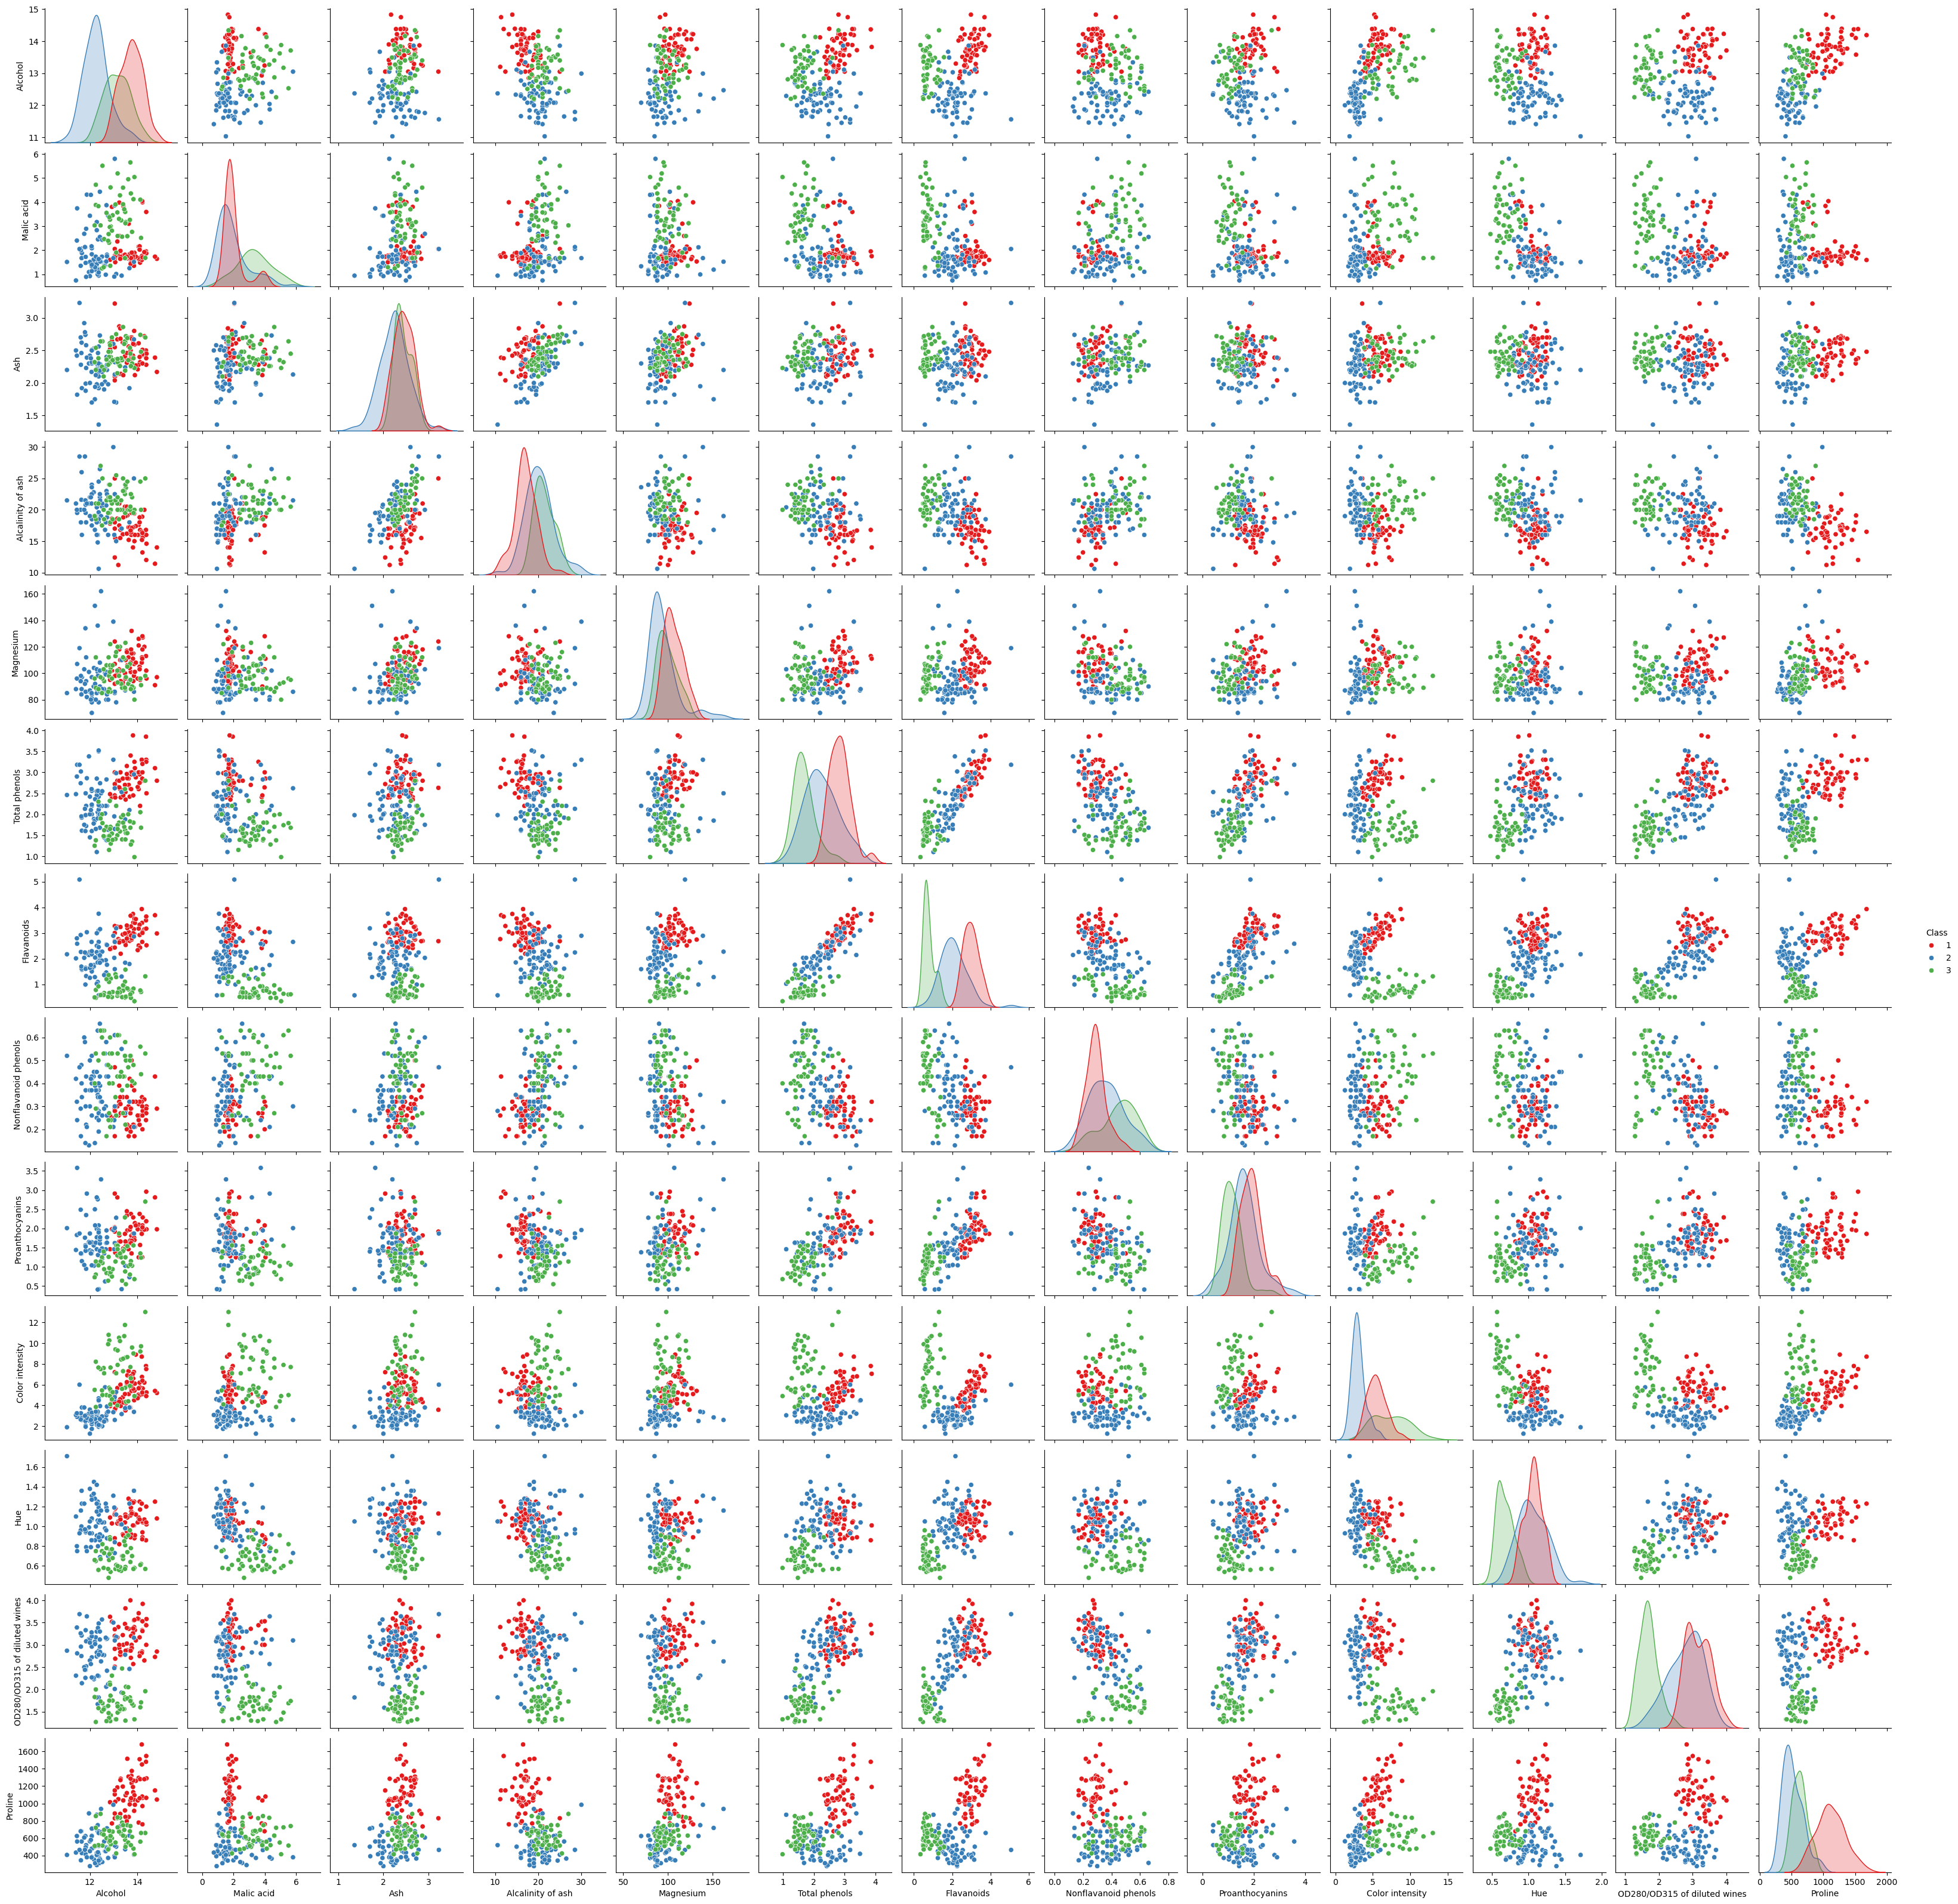

In [16]:
#Visualize the data set 
sns.pairplot(df, hue="Class", palette="Set1")
plt.show()


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()#Create a scaler

numeric_features = df.drop(columns=["Class"])#Remove the class before normalization 
normalized_data = scaler.fit_transform(numeric_features)#Normalize the data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_features.columns)#Convert into a dataframe 
normalized_df["Class"] = df["Class"]#Add the class information to normalized dataframe 
normalized_df.head(10)#Show the first 10 data point

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   
5  0.834211    0.201581  0.582888           0.237113   0.456522   
6  0.884211    0.223320  0.582888           0.206186   0.282609   
7  0.797368    0.278656  0.668449           0.360825   0.554348   
8  1.000000    0.177866  0.433155           0.175258   0.293478   
9  0.744737    0.120553  0.486631           0.278351   0.304348   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   
5       0.789655    0.643460              0.396226         0.492114   
6       0.524138    0.459916              0.320755         0.495268   
7       0.558621    0.457806              0.339623         0.264984   
8       0.627586    0.556962              0.301887         0.495268   
9       0.689655    0.592827              0.169811         0.454259   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  Class  
0         0.372014  0.455285                      0.970696  0.561341      1  
1         0.264505  0.463415                      0.780220  0.550642      1  
2         0.375427  0.447154                      0.695971  0.646933      1  
3         0.556314  0.308943                      0.798535  0.857347      1  
4         0.259386  0.455285                      0.608059  0.325963      1  
5         0.466724  0.463415                      0.578755  0.835949      1  
6         0.338737  0.439024                      0.846154  0.721826      1  
7         0.321672  0.471545                      0.846154  0.725392      1  
8         0.334471  0.487805                      0.578755  0.547076      1  
9         0.506826  0.430894                      0.835165  0.547076      1

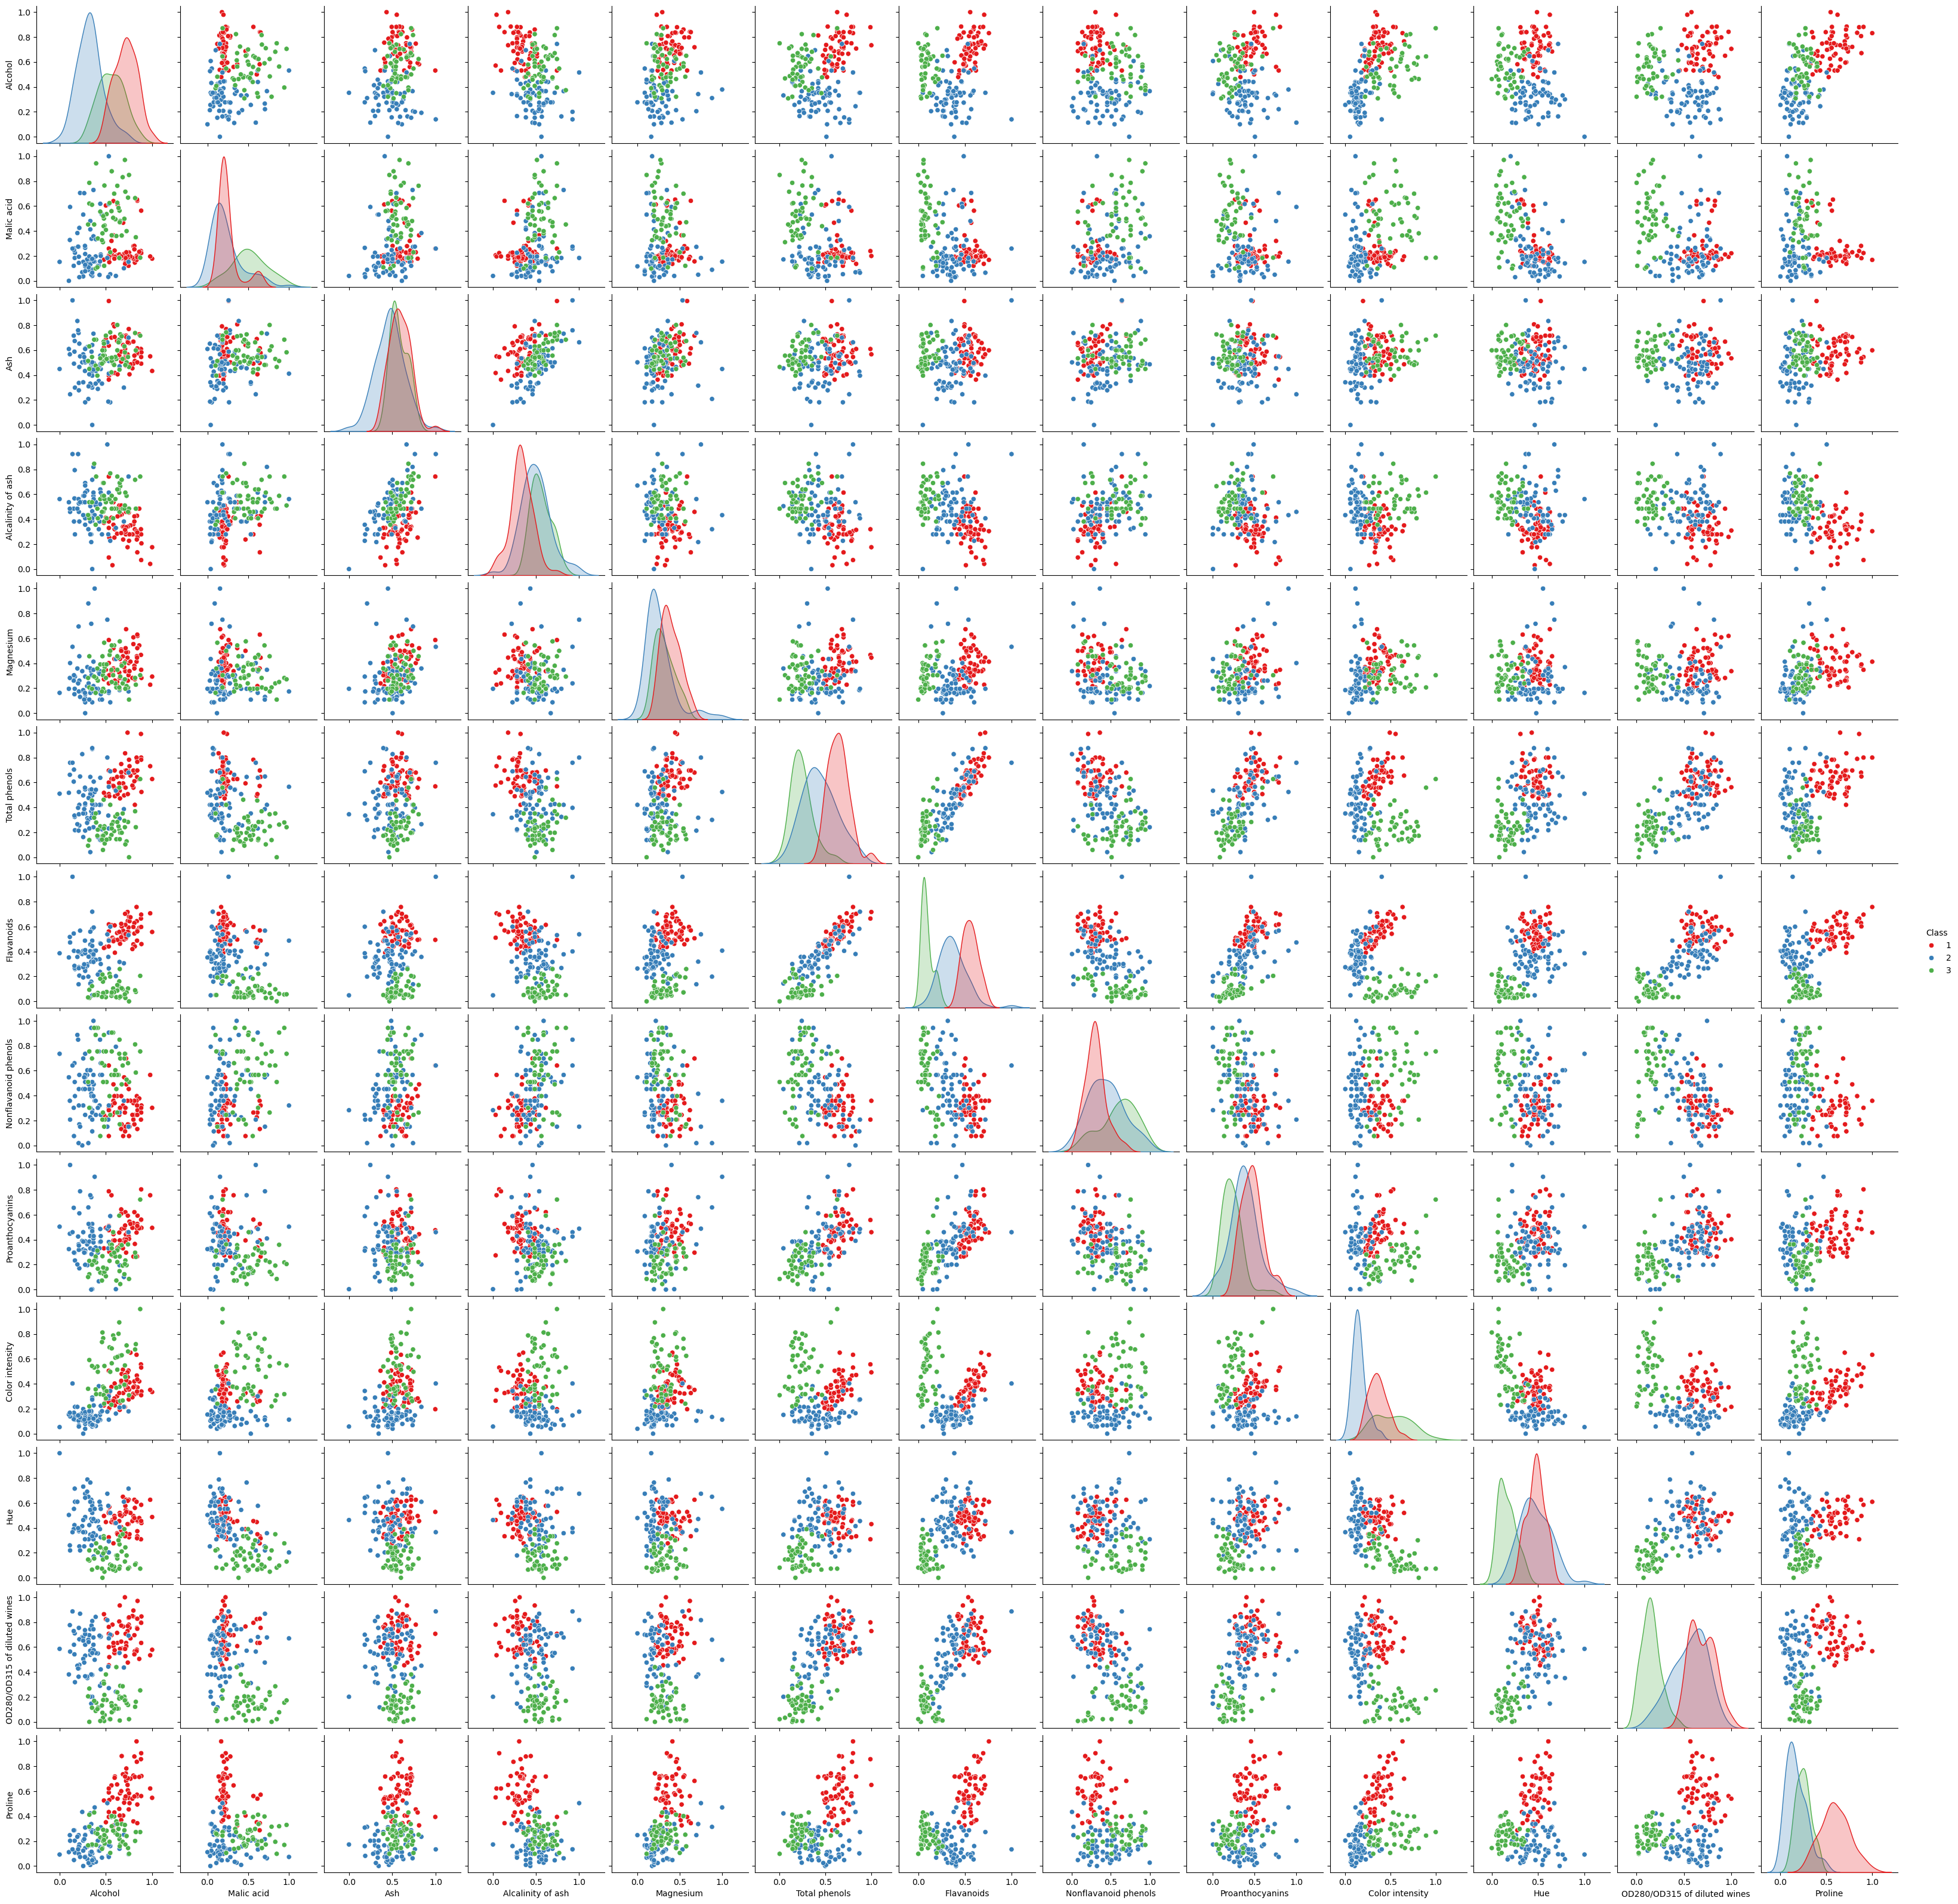

In [17]:
#Visualize the normalized data set 
sns.pairplot(normalized_df, hue="Class", palette="Set1")
plt.show()


In [20]:
#Remove the class from normalized dataset 
X = normalized_df.drop(columns=["Class"])#Features
y = normalized_df["Class"]#Classes

#Train and test dataset creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True ,random_state=0)

print(X_train)
print(y_train)

#Check the size of dataset
print(f"Size of trainset: {X_train.shape}")
print(f"Size of testset: {X_test.shape}")


      Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
161  0.700000    0.498024  0.631016           0.484536   0.402174   
92   0.436842    0.156126  0.481283           0.520619   0.108696   
94   0.155263    0.247036  0.491979           0.381443   0.304348   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
24   0.650000    0.211462  0.668449           0.484536   0.282609   
..        ...         ...       ...                ...        ...   
103  0.207895    0.193676  0.278075           0.458763   0.173913   
67   0.352632    0.084980  0.299465           0.463918   0.086957   
117  0.365789    0.171937  0.443850           0.613402   0.413043   
47   0.755263    0.185771  0.406417           0.278351   0.336957   
172  0.823684    0.349802  0.598930           0.484536   0.228261   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
161       0.293103    0.046414              0.698113         0.123028   
92        0.137931    0.2

In [37]:
from knn import knn_euc
from knn import knn_man

In [31]:
#Example prompt
k = 3
y_pred_euc = knn_euc(X_train, y_train, X_test, k)
y_pred_man = knn_man(X_train, y_train, X_test, k)

print("Predictions using Eucladian distances:", y_pred_euc)
print("Predictions using Manhattan distances:", y_pred_man)
print(len(y_pred_euc))#Check the test dataset length and prediction dataset length equal or not
print(len(y_pred_man))


Predictions using Eucladian distances: [1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1]
Predictions using Manhattan distances: [1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1]
36
36


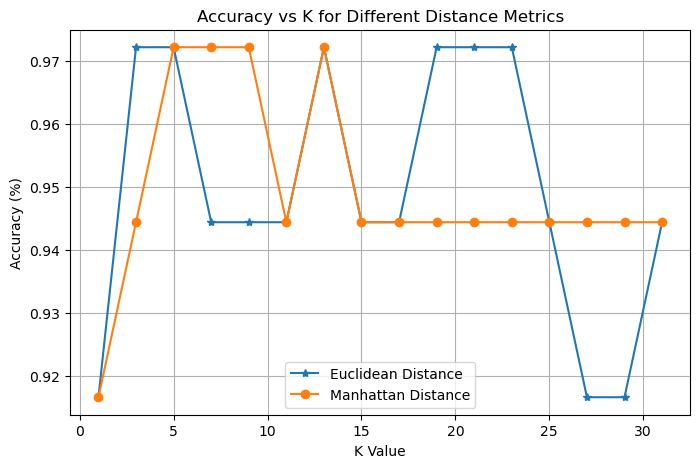

In [33]:
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
accuracies_euc = []  # Euclidean distance accuracy array
accuracies_man = []  # Manhattan distance accuracy array

# Calculate the accuracies for different k values 
for k in k_values:
    y_pred_euc = knn_euc(X_train, y_train, X_test, k)
    y_pred_man = knn_man(X_train, y_train, X_test, k)
    
    accuracy_euc = accuracy_score(y_test, y_pred_euc)
    accuracy_man = accuracy_score(y_test, y_pred_man)
    
    accuracies_euc.append(accuracy_euc)
    accuracies_man.append(accuracy_man)

# Accuracy vs K graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies_euc, label='Euclidean Distance', marker='*')
plt.plot(k_values, accuracies_man, label='Manhattan Distance', marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs K for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
from sklearn.metrics import confusion_matrix

# Eucladian distance for k=9
y_pred_euc = knn_euc(X_train, y_train, X_test, 9)

# Confusion Matrix (Euclidean)
cm_euc = confusion_matrix(y_test, y_pred_euc)

# Manhattan distance for k=9
y_pred_man = knn_man(X_train, y_train, X_test, 9)

# Confusion Matrix (Manhattan)
cm_man = confusion_matrix(y_test, y_pred_man)

print("Confusion matrix for Eucladian distance for k=9")
print(cm_euc)
print("Confusion matrix for Manhattan distance for k=9")
print(cm_man)

Confusion matrix for Eucladian distance for k=9
[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]
Confusion matrix for Manhattan distance for k=9
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
